In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

In [5]:
# df =sns.load_dataset("titanic")
# df.to_csv("titanicsur.csv")
df = pd.read_csv("titanicsur2.csv")
df.isnull().mean()
df.head(5)

,Unnamed: 0,survived,age,sibsp,fare
0,0,0,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,2,1,26.0,0,7.9250
3,3,1,35.0,1,53.1000
4,4,0,35.0,0,8.0500


In [6]:
mean_age = df['age'].mean()
median_age = df['age'].median()
df['mean_age'] = df['age'].fillna(mean_age)
df['median_age']=df['age'].fillna(median_age)
df

,Unnamed: 0,survived,age,sibsp,fare,mean_age,median_age
0,0,0,22.0,1,7.2500,22.000000,22.0
1,1,1,38.0,1,71.2833,38.000000,38.0
2,2,1,26.0,0,7.9250,26.000000,26.0
3,3,1,35.0,1,53.1000,35.000000,35.0
4,4,0,35.0,0,8.0500,35.000000,35.0
...,...,...,...,...,...,...,...
886,886,0,27.0,0,13.0000,27.000000,27.0
887,887,1,19.0,0,30.0000,19.000000,19.0
888,888,0,NaN,1,23.4500,29.699118,28.0
889,889,1,26.0,0,30.0000,26.000000,26.0


In [7]:
print("age varience of original age column is" , df['age'].var())
print("age varience of mean applied age column is" , df['mean_age'].var())
print("age varience of mean applied age column is" , df['median_age'].var())


age varience of original age column is 211.0191247463081
age varience of mean applied age column is 169.05239993721085
age varience of mean applied age column is 169.51249827942328


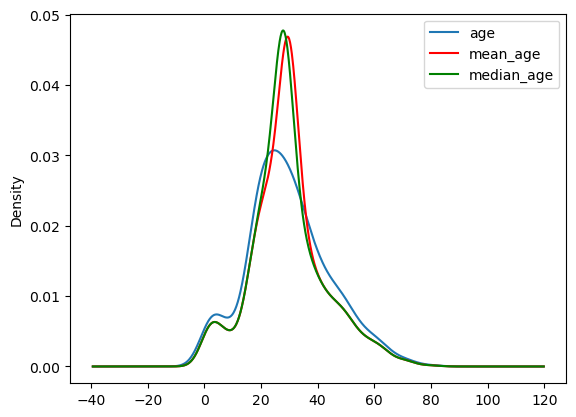

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df['mean_age'].plot(kind='kde',color='red',ax=ax)
df['median_age'].plot(kind='kde',color='green',ax=ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [25]:
# Now we can see some corelation for age columns
# df.corr()
df.cov()

,Unnamed: 0,survived,age,sibsp,fare,mean_age,median_age
Unnamed: 0,66231.000000,-0.626966,138.696504,-16.325843,161.883369,111.113042,114.633461
survived,-0.626966,0.236772,-0.551296,-0.018954,6.221787,-0.441656,-0.411226
age,138.696504,-0.551296,211.019125,-4.163334,73.849030,211.019125,211.019125
sibsp,-16.325843,-0.018954,-4.163334,1.216043,8.748734,-3.335345,-3.349525
fare,161.883369,6.221787,73.849030,8.748734,2469.436846,59.162200,62.556767
mean_age,111.113042,-0.441656,211.019125,-3.335345,59.162200,169.052400,169.052400
median_age,114.633461,-0.411226,211.019125,-3.349525,62.556767,169.052400,169.512498


<Axes: >

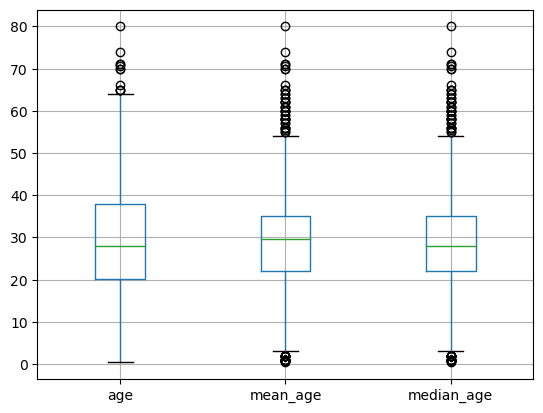

In [26]:
df[['age','mean_age','median_age']].boxplot()

In [17]:
X = df.drop(columns=['survived'])
y= df['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# X_train
imputer2 = SimpleImputer(strategy='mean')
imputer1 = SimpleImputer(strategy='median')
trf = ColumnTransformer([
    ('imputer1' , imputer1 ,['age']),
    ('imputer2' , imputer2 ,['fare'])
],remainder='passthrough')
trf.fit(X_train)
x_train = trf.transform(X_train)
x_test = trf.transform(X_test)
x_train

array([[ 40.        ,  27.7208    ,  30.        ,   0.        ,
         40.        ,  40.        ],
       [  4.        ,  16.7       ,  10.        ,   1.        ,
          4.        ,   4.        ],
       [ 47.        ,   9.        , 873.        ,   0.        ,
         47.        ,  47.        ],
       ...,
       [ 71.        ,  49.5042    , 493.        ,   0.        ,
         71.        ,  71.        ],
       [ 28.75      , 221.7792    , 527.        ,   0.        ,
         29.69911765,  28.        ],
       [ 28.75      ,  25.925     , 168.        ,   0.        ,
         29.69911765,  28.        ]])